## Experiment 1
### Digital Signal Processing Lab

In [18]:
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [19]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 8})

pi = np.pi

In [20]:
#Roll number: 191EE238
alpha = 1 + 238 % 4  
print(alpha)

3


#### Problem 1

In [21]:
def create_signal(t,a):
    return np.exp(-t/a)

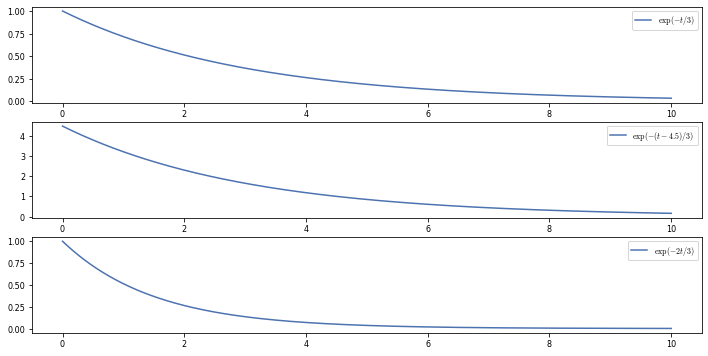

In [22]:
t = np.linspace(0,10,num = 1001 )
y1 = create_signal(t,alpha)
y2 = create_signal(t - 1.5*alpha,alpha)
y3 = create_signal(2*t,alpha)

plt.subplot(3,1,1)
plt.plot(t,y1,label = '$\exp{(-t/3)}$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,y2,label = '$\exp{(-(t - 4.5)/3)}$' )
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,y3,label = '$\exp{(-2t/3)}$')
plt.legend()

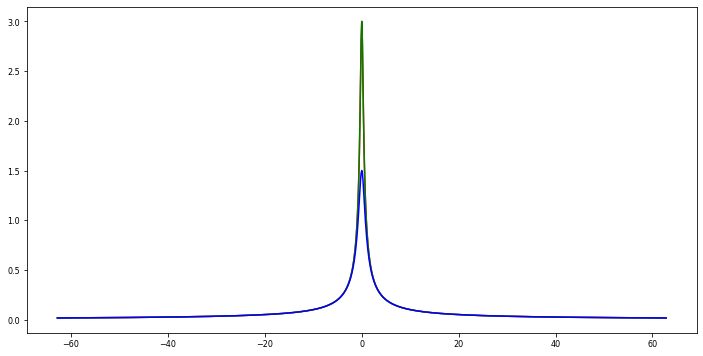

In [23]:
#Fourier Transforms
w = 2*pi*np.linspace(-10,10,num = 1001)
Y1 = 1/(1j*w + (1/alpha))
Y2 = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha)) #Y2 = Y1(w)* exp(-jwt0)
Y3 = 0.5 * 1/((1j*w*0.5)+(1/alpha))               # Y3 = 1/2 * Y1(w/2)

plt.figure()
plt.plot(w,np.abs(Y1),'r')
plt.plot(w,np.abs(Y2),'g')
plt.plot(w,np.abs(Y3),'b')

#### Problem 2

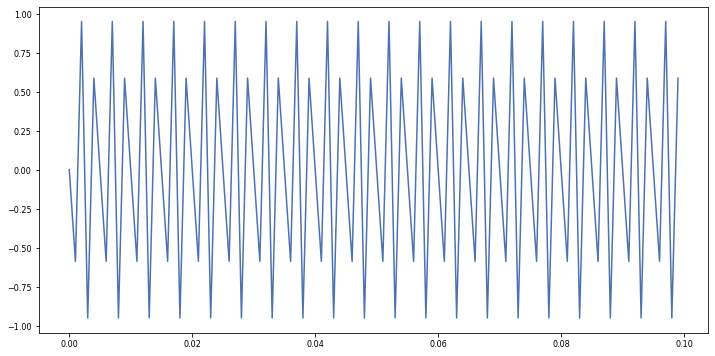

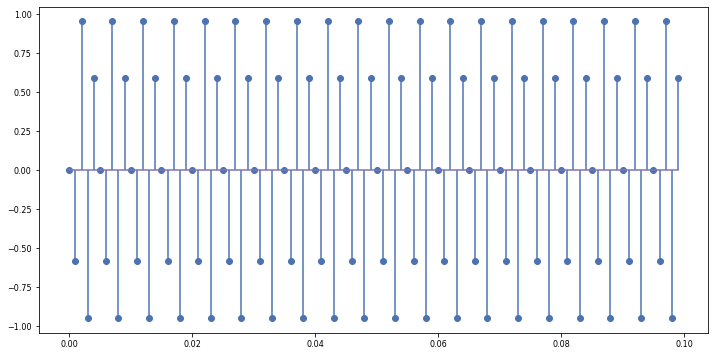

In [24]:
f1 = 200*3
f2 = 220*3
pi = math.pi
t = np.linspace(0,4.999,num = 5000)
y1 = np.sin(2*pi*f1*t)
y2 = np.sin(2*pi*f2*t)
y = np.append(y1,y2,axis = 0)

wavfile.write('appended_signals.wav',44100,y)

plt.plot(t[0:100],y[0:100])
plt.figure()
plt.stem(t[0:100],y[0:100])

IPython.display.Audio(y,rate = 10000)

#### Problem 3

In [25]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X

In [26]:
conv_text = np.loadtxt('Experiment-1\ConvFile3.txt')
Fs, track = wavfile.read('Experiment-1\Track003.wav')

#To separate values from dual channel
track1 = []
for i in range(len(track)):
    track1.append(track[i][0])

print("Number of data samples in track: " + str(len(track1)))
print("Number of samples in ConvFile: " + str(len(conv_text)))
IPython.display.Audio(track1, rate = Fs)

Number of data samples in track: 661500
Number of samples in ConvFile: 201


In [27]:
convolved_signal = scipy.signal.convolve(track1,conv_text)
print("Number of samples in fully convolved signal: " + str(len(convolved_signal)))
IPython.display.Audio(convolved_signal,rate = Fs)

wavfile.write('Experiment-1\Convolved_signal.wav',Fs,convolved_signal)

Number of samples in fully convolved signal: 661700


(array([0.00000000e+00, 6.66465165e-02, 1.33293033e-01, ...,
        2.57737768e+03, 2.57744433e+03, 2.57751097e+03]),
 array([4201.55696324, 4740.29150898, 1185.03376231, ..., 1493.79920633,
        1348.48532   , 1536.28323938]))

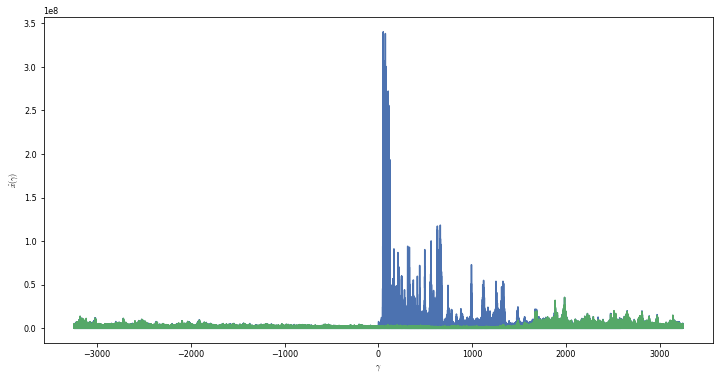

In [28]:
plot_spec(track1,Fs,Fs/2)
plot_spec(convolved_signal,Fs,Fs/2)

The convolved signal has suppressed low frequencies from the track. Hence the ConvFile3 contains samples from a High Pass filter

In [29]:
convolved_signal_valid = scipy.signal.convolve(track1,conv_text,mode='valid')
print("Number of samples in valid convolved signal: " + str(len(convolved_signal_valid)))

IPython.display.Audio(convolved_signal_valid,rate = Fs)

Number of samples in valid convolved signal: 661300


In [30]:
convolved_signal_same = scipy.signal.convolve(track1,conv_text,mode='same')
print("Number of samples in same convolved signal: " + str(len(convolved_signal_same)))

IPython.display.Audio(convolved_signal_same,rate = Fs)

Number of samples in same convolved signal: 661500


#### Problem 4

In [31]:
Fs, speech = wavfile.read('speech.wav')
print('Sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(speech, rate=Fs)

Sampling rate: 16000Hz


In [32]:
def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

y = multiply_signals(speech, 500, Fs)
IPython.display.Audio(y, rate=Fs)

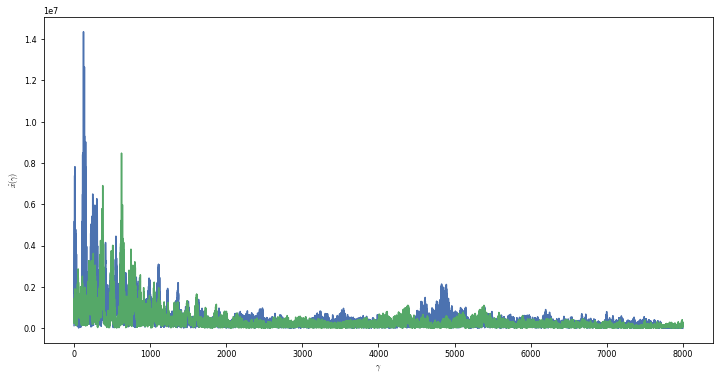

In [33]:
N,x = plot_spec(speech, Fs, Fs/2)
n,X = plot_spec(y, Fs, Fs/2)

In [34]:
print(n[np.argmax(X)])
print(N[np.argmax(x)])

623.6164297329906
123.80003147458427


Here the modulated wave is frequency shifted by amount 'F'